## Task_1 - Optimizers

## Architecture - DenseNet121

In this task, you will investigate how different optimizers affect the training behavior.

Pick a architecture of your choice to train on Cifar10. Train this architecture with different Optimizers and different hyperparameters.
Compare the training curves

e.g. regarding:
steps until convergence (or loss) 
when converged

stability of training (fluctuation of the curve)

Now choose a different architecture and/or data set and repeat the experiments.

Are the results (qualitatively) still the same? If they are different, discuss potential reasons.
Bonus: Do not only compare visually, but use meaningful quantitative measures for comparison.

In [ ]:
import tensorflow as tf
import numpy as np
from keras.callbacks import ReduceLROnPlateau

import os
import matplotlib.pyplot as plt


In [ ]:
train_images, test_images = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 7s 0us/step


In [ ]:
images, labels = train_images
test_images, test_labels = test_images

In [ ]:
images = (images/255.0)
images = images.astype(np.float32)
labels = labels.astype(np.int32)
test_images = (test_images/255.0)
test_images = test_images.astype(np.float32)
test_labels = test_labels.astype(np.int32)

dataset = tf.data.Dataset.from_tensor_slices((images, labels))
ds = dataset.shuffle(5000).batch(64)

In [ ]:
input_shape = images[0].shape

In [ ]:
model_1 = tf.keras.applications.DenseNet121(include_top=True, weights=None,input_tensor=None,input_shape=input_shape,
    pooling='max',
    classes=10)

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='accuracy', factor=0.2, patience=2, min_lr=0.001)

In [ ]:
model_1.compile(optimizer='Adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])

In [ ]:
model_1.fit(ds,epochs=20, callbacks= [reduce_lr], use_multiprocessing=True)

Epoch 1/20
782/782 [==============================] - 30s 38ms/step - loss: 1.4550 - accuracy: 0.4769
Epoch 2/20
782/782 [==============================] - 29s 37ms/step - loss: 1.0597 - accuracy: 0.6281
Epoch 3/20
782/782 [==============================] - 30s 38ms/step - loss: 0.8911 - accuracy: 0.6894
Epoch 4/20
782/782 [==============================] - 30s 38ms/step - loss: 0.7704 - accuracy: 0.7329
Epoch 5/20
782/782 [==============================] - 32s 42ms/step - loss: 0.6796 - accuracy: 0.7650
Epoch 6/20
782/782 [==============================] - 32s 41ms/step - loss: 0.5929 - accuracy: 0.7959
Epoch 7/20
782/782 [==============================] - 31s 39ms/step - loss: 0.5199 - accuracy: 0.8188
Epoch 8/20
782/782 [==============================] - 31s 40ms/step - loss: 0.4349 - accuracy: 0.8476
Epoch 9/20
782/782 [==============================] - 31s 40ms/step - loss: 0.3569 - accuracy: 0.8746
Epoch 10/20
782/782 [==============================] - 31s 39ms/step - loss: 0.295

In [ ]:
os.chdir('/content/drive/My Drive/My_IDL')
model_1.save('model_1.h5')

In [ ]:
accuracy_adam = model_1.history.history['accuracy']
loss_adam = model_1.history.history['loss']

In [ ]:
model_2 = tf.keras.applications.DenseNet121(include_top=True, weights=None,input_tensor=None,input_shape=input_shape,
    pooling='max',
    classes=10)


In [ ]:
model_3 = tf.keras.applications.DenseNet121(include_top=True, weights=None,input_tensor=None,input_shape=input_shape,
    pooling='max',
    classes=10)

In [ ]:
reduce_lr_1 = ReduceLROnPlateau(monitor='accuracy', factor=0.2, patience=2, min_lr=0.001)

In [ ]:
model_2.compile(optimizer='RMSprop', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])

In [ ]:
model_3.compile(optimizer='SGD', loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
model_2.fit(ds,epochs=20, callbacks= [reduce_lr_1], use_multiprocessing=True)

Epoch 1/20
782/782 [==============================] - 47s 60ms/step - loss: 1.5200 - accuracy: 0.4672
Epoch 2/20
782/782 [==============================] - 44s 57ms/step - loss: 1.0619 - accuracy: 0.6323
Epoch 3/20
782/782 [==============================] - 45s 57ms/step - loss: 0.8581 - accuracy: 0.7016
Epoch 4/20
782/782 [==============================] - 44s 57ms/step - loss: 0.7327 - accuracy: 0.7485
Epoch 5/20
782/782 [==============================] - 45s 57ms/step - loss: 0.6408 - accuracy: 0.7792
Epoch 6/20
782/782 [==============================] - 44s 57ms/step - loss: 0.5542 - accuracy: 0.8122
Epoch 7/20
782/782 [==============================] - 45s 58ms/step - loss: 0.4689 - accuracy: 0.8356
Epoch 8/20
782/782 [==============================] - 44s 56ms/step - loss: 0.3965 - accuracy: 0.8625
Epoch 9/20
782/782 [==============================] - 46s 59ms/step - loss: 0.3359 - accuracy: 0.8824
Epoch 10/20
782/782 [==============================] - 44s 56ms/step - loss: 0.279

In [ ]:
model_3.fit(ds,epochs=20, callbacks= [reduce_lr_1], use_multiprocessing=True)

Epoch 1/20
782/782 [==============================] - 27s 35ms/step - loss: 1.7266 - accuracy: 0.3716
Epoch 2/20
782/782 [==============================] - 27s 35ms/step - loss: 1.3945 - accuracy: 0.4971
Epoch 3/20
782/782 [==============================] - 28s 36ms/step - loss: 1.2273 - accuracy: 0.5580
Epoch 4/20
782/782 [==============================] - 29s 37ms/step - loss: 1.0970 - accuracy: 0.6067
Epoch 5/20
782/782 [==============================] - 28s 35ms/step - loss: 0.9869 - accuracy: 0.6474
Epoch 6/20
782/782 [==============================] - 26s 34ms/step - loss: 0.8907 - accuracy: 0.6814
Epoch 7/20
782/782 [==============================] - 28s 35ms/step - loss: 0.8069 - accuracy: 0.7123
Epoch 8/20
782/782 [==============================] - 27s 34ms/step - loss: 0.7239 - accuracy: 0.7447
Epoch 9/20
782/782 [==============================] - 27s 34ms/step - loss: 0.6518 - accuracy: 0.7715
Epoch 10/20
782/782 [==============================] - 27s 35ms/step - loss: 0.574

In [ ]:
model_2.save('model_2.h5')
model_3.save('model_3.h5')

In [ ]:
accuracy_rmsprop = model_2.history.history['accuracy']
loss_rmsprop = model_2.history.history['loss']

In [ ]:
accuracy_sgd = model_3.history.history['accuracy']
loss_sgd = model_3.history.history['loss']

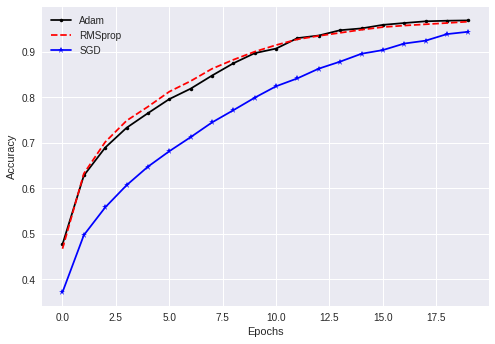

In [ ]:
plt.style.use('seaborn')
plt.plot(accuracy_adam, '.-k', label='Adam')
plt.plot(accuracy_rmsprop, '--r', label = 'RMSprop')
plt.plot(accuracy_sgd, '*-b', label='SGD')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')

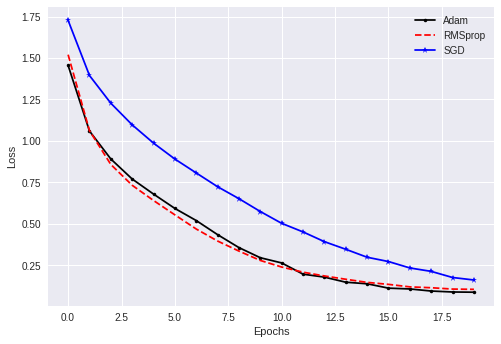

In [ ]:
plt.plot(loss_adam, '.-k', label='Adam')
plt.plot(loss_rmsprop, '--r', label = 'RMSprop')
plt.plot(loss_sgd, '*-b', label='SGD')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')

In [ ]:
test_acc_adam = model_1.evaluate(test_images, test_labels, batch_size=32, use_multiprocessing=True)

313/313 [==============================] - 3s 9ms/step - loss: 1.2424 - accuracy: 0.7532


In [ ]:
test_acc_rmsprop = model_2.evaluate(test_images, test_labels, batch_size=32, use_multiprocessing=True)

313/313 [==============================] - 3s 10ms/step - loss: 1.3492 - accuracy: 0.7559


In [ ]:
test_acc_sgd = model_3.evaluate(test_images, test_labels, batch_size=32, use_multiprocessing=True)

313/313 [==============================] - 3s 10ms/step - loss: 2.0645 - accuracy: 0.5761


**Architecture chosen: DenseNet121**

Trained with 3 different optimizers: Adam, RMSprop, SGD. 

Accuarcy comparison: Trained for 20 epochs , Adam and Rmsprop is performing almost the same, but Adam, slightly better at 96.88% and RMSprop at 96.61% training accuracy. But we can see the model is overfitting. SGD is performing the worst of all with 94% training accuracy, which was not expected. 
Test accuracy for all the optimizers is not up to the mark. SGD performs worst with 57% test accuracy. 

Loss comparison: RMSprop and SGD shows a convex curve with no major fluctuation, where the loss decreases eventually. But we can see some fluctuations in the loss graph for Adam between 8 to 15 epochs.

##  Architecture - Resnet50

In [ ]:
model_4 = tf.keras.applications.ResNet50(
    input_shape=input_shape,
    weights= None,
    pooling='max',
    classes=10
)

model_5 = tf.keras.applications.ResNet50(
    input_tensor=None,
    weights=None,
    input_shape=input_shape,
    pooling='max',
    classes=10
)

model_6 = tf.keras.applications.ResNet50(
    weights=None,
    input_tensor=None,
    input_shape=input_shape,
    pooling='max',
    classes=10
    
)

In [ ]:
reduce_lr_2 = ReduceLROnPlateau(monitor='accuracy', factor=0.2, patience=2, min_lr=0.001)

In [ ]:
model_4.compile(optimizer='Adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])
model_5.compile(optimizer='RMSprop', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])
model_6.compile(optimizer='SGD', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])

In [ ]:
model_4.fit(ds,epochs=30, callbacks= [reduce_lr_2], use_multiprocessing=True)

Epoch 1/30
782/782 [==============================] - 35s 45ms/step - loss: 1.2247 - accuracy: 0.5941
Epoch 2/30
782/782 [==============================] - 34s 44ms/step - loss: 1.2737 - accuracy: 0.5798
Epoch 3/30
782/782 [==============================] - 34s 43ms/step - loss: 1.0810 - accuracy: 0.6335
Epoch 4/30
782/782 [==============================] - 34s 44ms/step - loss: 1.2735 - accuracy: 0.5769
Epoch 5/30
782/782 [==============================] - 34s 43ms/step - loss: 1.0618 - accuracy: 0.6420
Epoch 6/30
782/782 [==============================] - 34s 44ms/step - loss: 1.1368 - accuracy: 0.6207
Epoch 7/30
782/782 [==============================] - 35s 45ms/step - loss: 1.0854 - accuracy: 0.6314
Epoch 8/30
782/782 [==============================] - 35s 45ms/step - loss: 0.8888 - accuracy: 0.6978
Epoch 9/30
782/782 [==============================] - 35s 44ms/step - loss: 0.7698 - accuracy: 0.7361
Epoch 10/30
782/782 [==============================] - 34s 44ms/step - loss: 0.964

In [ ]:
model_5.fit(ds,epochs=30, callbacks= [reduce_lr_2], use_multiprocessing=True)

Epoch 1/30
782/782 [==============================] - 42s 54ms/step - loss: 2.2395 - accuracy: 0.3311
Epoch 2/30
782/782 [==============================] - 41s 53ms/step - loss: 1.8982 - accuracy: 0.4218
Epoch 3/30
782/782 [==============================] - 41s 53ms/step - loss: 1.4972 - accuracy: 0.5165
Epoch 4/30
782/782 [==============================] - 41s 53ms/step - loss: 1.2844 - accuracy: 0.5838
Epoch 5/30
782/782 [==============================] - 41s 53ms/step - loss: 1.1394 - accuracy: 0.6263
Epoch 6/30
782/782 [==============================] - 42s 53ms/step - loss: 1.0009 - accuracy: 0.6672
Epoch 7/30
782/782 [==============================] - 41s 53ms/step - loss: 0.8911 - accuracy: 0.7050
Epoch 8/30
782/782 [==============================] - 41s 53ms/step - loss: 0.7793 - accuracy: 0.7343
Epoch 9/30
782/782 [==============================] - 42s 53ms/step - loss: 0.7254 - accuracy: 0.7572
Epoch 10/30
782/782 [==============================] - 41s 53ms/step - loss: 0.643

In [ ]:
model_6.fit(ds,epochs=30, callbacks= [reduce_lr_2], use_multiprocessing=True)

Epoch 1/30
782/782 [==============================] - 33s 42ms/step - loss: 2.2761 - accuracy: 0.3395
Epoch 2/30
782/782 [==============================] - 33s 42ms/step - loss: 1.7663 - accuracy: 0.4609
Epoch 3/30
782/782 [==============================] - 32s 41ms/step - loss: 1.5801 - accuracy: 0.5115
Epoch 4/30
782/782 [==============================] - 32s 41ms/step - loss: 1.4542 - accuracy: 0.5494
Epoch 5/30
782/782 [==============================] - 32s 41ms/step - loss: 1.3575 - accuracy: 0.5832
Epoch 6/30
782/782 [==============================] - 32s 41ms/step - loss: 1.2462 - accuracy: 0.6108
Epoch 7/30
782/782 [==============================] - 32s 41ms/step - loss: 1.1739 - accuracy: 0.6322
Epoch 8/30
782/782 [==============================] - 32s 41ms/step - loss: 1.0988 - accuracy: 0.6584
Epoch 9/30
782/782 [==============================] - 32s 41ms/step - loss: 1.0053 - accuracy: 0.6877
Epoch 10/30
782/782 [==============================] - 32s 41ms/step - loss: 0.896

In [ ]:
accuracy_rmsprop = model_5.history.history['accuracy']
loss_rmsprop = model_5.history.history['loss']

In [ ]:
model_4.save('model_4.h5')
model_5.save('model_5.h5')
model_6.save('model_6.h5')

In [ ]:
accuracy_adam = model_4.history.history['accuracy']
loss_adam = model_4.history.history['loss']

In [ ]:
accuracy_sgd = model_6.history.history['accuracy']
loss_sgd = model_6.history.history['loss']

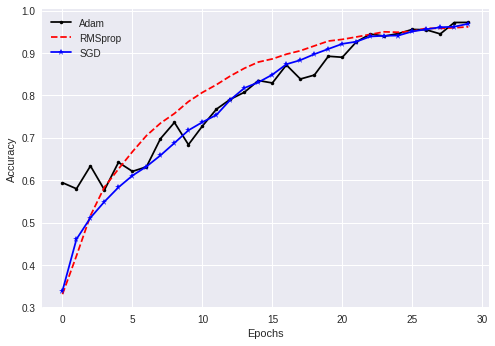

In [ ]:
plt.style.use('seaborn')
plt.plot(accuracy_adam, '.-k', label='Adam')
plt.plot(accuracy_rmsprop, '--r', label = 'RMSprop')
plt.plot(accuracy_sgd, '*-b', label='SGD')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')

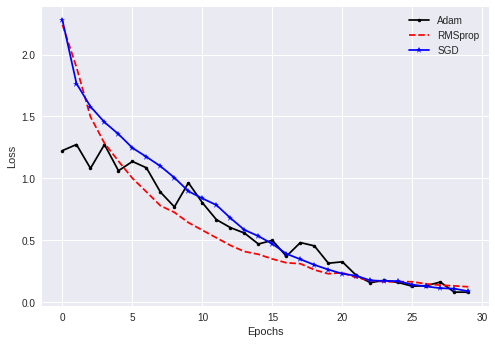

In [ ]:
plt.plot(loss_adam, '.-k', label='Adam')
plt.plot(loss_rmsprop, '--r', label = 'RMSprop')
plt.plot(loss_sgd, '*-b', label='SGD')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')

In [ ]:
test_acc_adam_res = model_4.evaluate(test_images, test_labels, batch_size=32, use_multiprocessing=True)

313/313 [==============================] - 3s 9ms/step - loss: 1.4154 - accuracy: 0.7360


In [ ]:
test_acc_rmsprop_res = model_5.evaluate(test_images, test_labels, batch_size=32, use_multiprocessing=True)

313/313 [==============================] - 3s 9ms/step - loss: 4.9028 - accuracy: 0.5196


In [ ]:
test_acc_sgd_res = model_6.evaluate(test_images, test_labels, batch_size=32, use_multiprocessing=True)

313/313 [==============================] - 3s 9ms/step - loss: 2.4278 - accuracy: 0.5799


# Observations

**Architecture chosen: DenseNet121**

Trained with 3 different optimizers: Adam, RMSprop, SGD. 

Accuarcy comparison: Trained for 20 epochs , Adam and Rmsprop is performing almost the same, but Adam, slightly better at 96.88% and RMSprop at 96.61% training accuracy. But we can see the model is overfitting. SGD is performing the worst of all with 94% training accuracy, which was not expected. 
Test accuracy for all the optimizers is not up to the mark. SGD performs worst with 57% test accuracy. 

Loss comparison: RMSprop and SGD shows a convex curve with no major fluctuation, where the loss decreases eventually. But we can see some fluctuations in the loss graph for Adam between 8 to 15 epochs.

**Architecture chosen: Resnet50**

Trained with 3 different optimizers: Adam, RMSprop, SGD.

Accuarcy comparison: Trained for 30 epochs , all the optimizers are performing almost similar. But we can see the model is overfitting. SGD is performing better with resnet model compared to densenet. There is a lot of fluctuation in the accuracy curve of the model using adam optimizer. 

Loss comparison: RMSprop shows a convex curve with no major fluctuation, where the loss decreases eventually. But we can see some fluctuations in the loss graph for SGD between 10 to 13 epochs. Similar to the fluctuations of accuracy curve of the model using adam optimizer, loss curve also behaves the same. 

**Comparing Densenet and Rensenet**

The first observation which is evident is that Densenet outperforms Resnet. Both the models overfit for this dataset. SGD and RMSprop work well with Densenet architecture, which is not the case in our example. Also we can see that Densenet converges faster than Resnet. 

Comparing the performance on test data: Densenet architecture with RMSprop optimizer works better on test data compared to other optimizers used and Resnet with all the three optimizers. 